In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

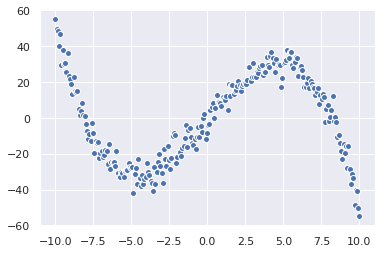

In [2]:
steps = 250
t = np.linspace(-10, 10, steps)
X = t.reshape(-1, 1)
y =  -0.15 * t**3 + 10 * t + 5 * np.random.randn(steps)

plt.scatter(t, y, ec='w')

Text(0, 0.5, 'y')

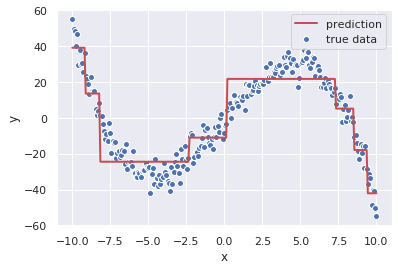

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)
y_pred = tree_reg.predict(X)

plt.scatter(t, y, ec='w', label='true data')
plt.plot(t, y_pred, c='r', lw=2, label='prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

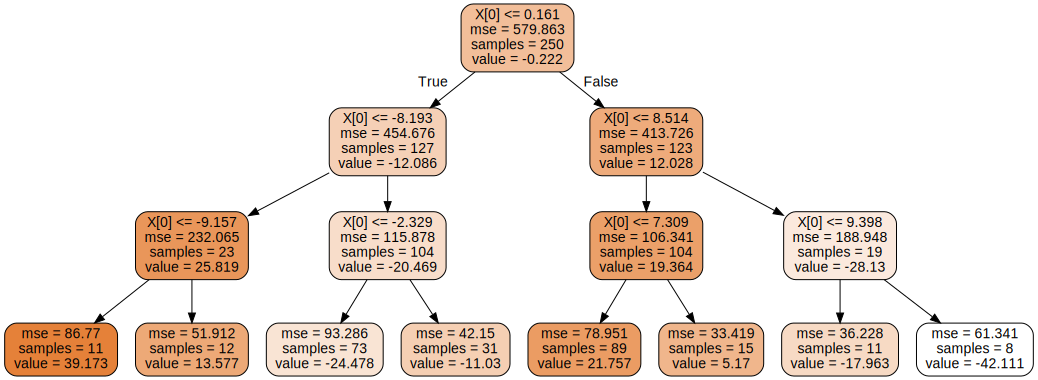

In [4]:
from sklearn.tree import export_graphviz
from graphviz import Source

graph = export_graphviz(tree_reg, leaves_parallel=True, rounded=True, filled=True)
graph_source = Source(graph)
graph_source

# Regularization Hyperparameters

Available hyperparameters:
- <b>max_depth</b> - the maximum depth of the tree
- <b>min_samples_split</b> - the minimum number of samples a node must have before it can be split
- <b>min_samples_leaf</b> - the minimum numer of samples a leaf node must have
- <b>min_weight_fraction_leaf</b> - same as *min_samples_leaf* but expressed as a fraction of the total number of weighted instances
- <b>max_leaf_nodes</b> - maximum number of leaf nodes
- <b>max_features</b> - maximum number of features that are evaluated for splitting at each node

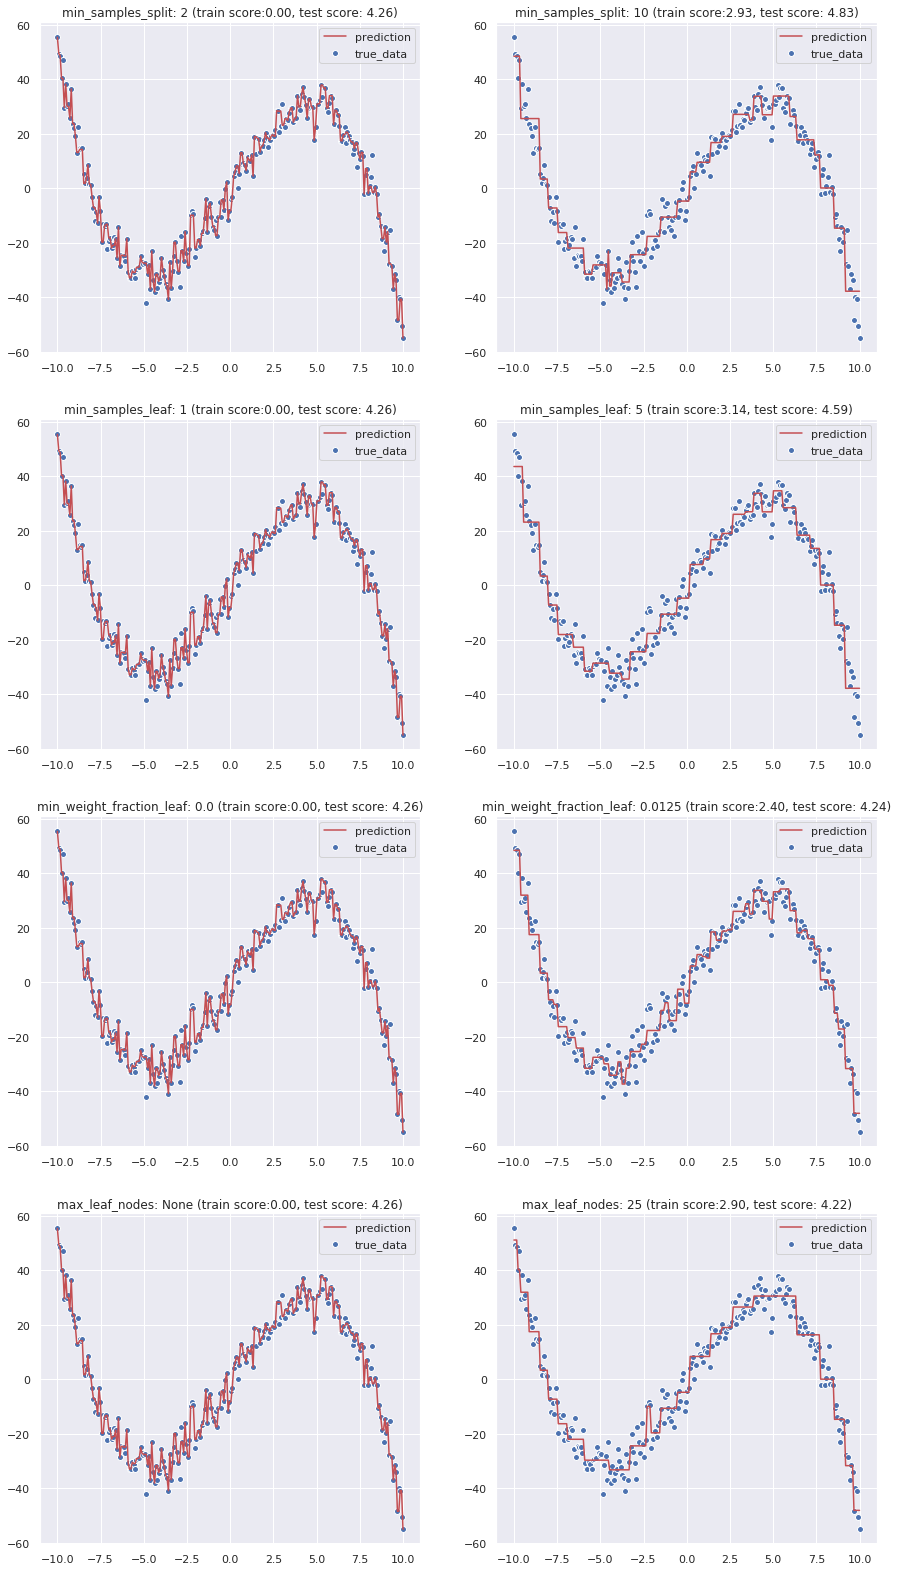

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

params = {
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'min_weight_fraction_leaf': [0.0, 0.0125],
    'max_leaf_nodes': [None, 25]
}

fig, axes = plt.subplots(nrows=len(params), ncols=2, figsize=(15, 28))

for param, ax in zip(params.items(), axes):
    param_name = param[0]
    param_values = param[1]
    for j, p_val in enumerate(param_values):
        tmp_params = {'max_depth': 15, param_name: p_val}

        tree_reg = DecisionTreeRegressor(**tmp_params)
        tree_reg.fit(X_train, y_train)
        
        y_train_pred = tree_reg.predict(X_train)
        y_test_pred = tree_reg.predict(X_test)
        y_pred = tree_reg.predict(X)
        
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        ax[j].scatter(X, y, label=f'true_data', ec='w')
        ax[j].plot(X, y_pred, label='prediction', c='r')
        ax[j].set_title(f'{param_name}: {p_val} (train score:{mae_train:.2f}, test score: {mae_test:.2f})')
        ax[j].legend()

